# Diagnostic Analysis using Python
## Author - Robbie Lightowler

##  Introduction

The NHS is a publically funded healthcare institution within England. The NHS provides General Practitioner appointments (GP appointments) for patients in order to support their wellbeing. 

Despite the positive concept around GP appointments, there is a huge cost inefficiency related to patients missing their reserved timeslots. 

An investigation is required in order to uncover why these appointments are being missed, and whether there are actions that the NHS can undertake as an institution to improve utilisation of these appointments. 

## Code Objectives

This code aims to provide a diagnostic analysis into 4 different data sources provided by the NHS in order to find recommendations to improve the utilisation of GP appointments. 

- Problem Statement -> What are the factors that influencing patients missing GP appointments? 

### Questions answered through Descriptive Statistics:
- How many locations are there?
- What are the top 5 locations by 
- How many service settings are there?
- How many context types are there?
- How many national categories are there (e.g. Planned Clinic)
- How many appointments were attended?

### Questions answered using Diagnostic Statistics:
- How are patients booking appointments? (e.g. online or phone)
- Are there any patterns for time of day, or day of the week in relation to appointments?
- How are appointments distributed over region?
- How have appointments changed over time by:
        - appointment mode?
        - appointment status?

## Stucture of Report

- 1. Import of data to Jupyter Notebook 
- 2. Cleaning the data 
- 3. Descriptive statistics overview
- 4. Diagnostics analysis of questions
- 5. Summary of Insights 
- 6. Recommendations

# 1. Import of data to Jupyter Notebook

###  1.1 Load the Python Libraries into Jupyter Notebook

In [2]:
# Import the necessary libraries to perform the analysis.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime


### 1.2 Load the NHS files from the local directory with the current Jupyter Notebook

In [3]:
# Load actual_duration.csv, appointments_regional.csv, and national_categories.xlsx into\
# Juptyer notebook as Pandas DataFrames

# Import actual_duration.csv.
ad = pd.read_csv('actual_duration.csv')

# Import appointments_regional.csv.
ar = pd.read_csv('appointments_regional.csv')

# Import national_categories.xlsx.
nc = pd.read_excel('national_categories.xlsx')

# Import NHS_Region_Codes_Names.csv.
rc = pd.read_csv('nhs_names.csv')

###  1.3 Assess the shape of 'ad' Dataframe


In [4]:
# Assess ad DataFrame shape and data format.
print(ad.shape)
print(ad.dtypes)

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [5]:
# Visualise the ad DataFrame by showing the top 5 rows.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


### 1.4 Assess the shape of 'ar' Dataframe

In [6]:
# Assess ar DataFrame shape and data format.
print(ar.shape)
print(ar.dtypes)

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [7]:
# Visualise the ar DataFrame by showing the top 5 rows.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


###  1.5 Assess the shape of 'nc' Dataframe

In [8]:
# Assess nc DataFrame shape and data format.
print(nc.shape)
print(nc.dtypes)

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [9]:
# Visualise the nc DataFrame by showing the top 5 rows.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


### 1.6 Assess the shape of 'rc' Dataframe 


In [10]:
# Assess rc DataFrame shape and data format.
print(rc.shape)
print(rc.dtypes)

(42, 5)
icb_ons_code       object
icb_name           object
region_code        object
region_ons_code    object
region_name        object
dtype: object


In [11]:
# Visualise the rc DataFrame by showing the top 5 rows.
rc.head()

,icb_ons_code,icb_name,region_code,region_ons_code,region_name
0,E54000028,North Central London ICB,Y56,E40000003,London
1,E54000029,North East London ICB,Y56,E40000003,London
2,E54000027,North West London ICB,Y56,E40000003,London
3,E54000030,South East London ICB,Y56,E40000003,London
4,E54000031,South West London ICB,Y56,E40000003,London


# 2. Clean the Data
- Parse date columns into a date format 
- Test for missing values 
- Identify outliers 

## 2.1 ad 

###  2.1.1 ad cleaning

In [12]:
# Create new DataFrame to cleaned version of file.
# Convert Appointment_date column into date format using function pd.to_datetime.
ad_clean = ad.copy()
ad_clean['appointment_date'] = pd.to_datetime(ad_clean['appointment_date'])

# Test parsed date.
print(ad_clean.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [13]:
# Test ad_clean for missing values.
ad_clean_na = ad_clean.isnull().any()

# Print missing values. 
print(ad_clean_na)

sub_icb_location_code        False
sub_icb_location_ons_code    False
sub_icb_location_name        False
icb_ons_code                 False
region_ons_code              False
appointment_date             False
actual_duration              False
count_of_appointments        False
dtype: bool


In [14]:
# Left Join rc table to ad to add region names.
ad_clean_merge = pd.merge(ad_clean, rc[['region_ons_code','region_name']],on='region_ons_code', how='left')

# Join merge created duplicates, this was identified later in the code/
# so I have come back to fix it.
ad_clean_merge = ad_clean_merge.drop_duplicates().reset_index(drop=True)

# View output.
ad_clean_merge.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,region_name
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,North East and Yorkshire
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,North East and Yorkshire
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,North East and Yorkshire
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,North East and Yorkshire
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,North East and Yorkshire


In [132]:
# Check number of rows matches original DataFrame.
print(ad_clean_merge.shape)
print(ad.shape)

(137793, 9)
(137793, 8)


In [16]:
# Reorder ad_clean_merge columns.
# Reorder columns.
ad_clean_merge = ad_clean_merge[['sub_icb_location_code', 'sub_icb_location_ons_code', 'sub_icb_location_name',\
                   'icb_ons_code', 'region_ons_code', 'region_name', 'appointment_date',\
                   'actual_duration', 'count_of_appointments']]

ad_clean_merge.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,region_name,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,North East and Yorkshire,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,North East and Yorkshire,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,North East and Yorkshire,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,North East and Yorkshire,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,North East and Yorkshire,2021-12-01,16-20 Minutes,730


### 2.1.2 Identify ad anomalous categories 
- Within ad DataFrame, some anomalous data has been identified within the column ['actual_duration']

In [17]:
# Print a list of unique categorical data from ['actual_duration'].
ad_categories = ad_clean['actual_duration'].value_counts()
print(ad_categories)

Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: actual_duration, dtype: int64


## 2.2 ar 

### 2.2.1 ar cleaning

In [18]:
# Create new DataFrame to cleaned version of file.
# Convert Appointment_date column into date format using function pd.to_dateime.
ar_clean = ar.copy()
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Test parsed date.
print(ar_clean.dtypes)

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object


In [19]:
# Test ad_clean for missing values. 
ar_clean_na = ar_clean.isnull().any()

# Print missing values.
print(ar_clean_na)

icb_ons_code                         False
appointment_month                    False
appointment_status                   False
hcp_type                             False
appointment_mode                     False
time_between_book_and_appointment    False
count_of_appointments                False
dtype: bool


In [20]:
# Left Join rc table to ad to add region names.
ar_clean_merge = pd.merge(ar_clean, rc[['icb_ons_code','region_name']], on='icb_ons_code', how='left')

# View output.
ar_clean_merge.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,region_name
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,South East
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,South East
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,South East
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,South East
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,South East


In [131]:
# Check number of rows matches original DataFrame.
print(ar_clean_merge.shape)
print (ar.shape)

(596821, 8)
(596821, 7)


In [21]:
# Reorder ar_clean_merge columns.
ar_clean_merge = ar_clean_merge[['icb_ons_code', 'region_name', 'appointment_month', 'appointment_status',\
                                'hcp_type', 'appointment_mode', 'time_between_book_and_appointment',\
                                'count_of_appointments']]

# View the output.
ar_clean_merge.head()

,icb_ons_code,region_name,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,South East,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,South East,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,South East,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,South East,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,South East,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


### 2.2.2 Identify ar anomalous categories 
- Within ar DataFrame, some anomalous data has been identified within the columns:/
        - ['appointment_status']
        - ['hcp_type']
        - ['appointment_mode']
        - ['time_between_book_and_appointment']

In [22]:
# Print a list of the categorical data in each of these columns.
ar_category_1 = ar_clean_merge['appointment_status'].value_counts()
ar_category_2 = ar_clean_merge['hcp_type'].value_counts()
ar_category_3 = ar_clean_merge['appointment_mode'].value_counts()
ar_category_4 = ar_clean_merge['time_between_book_and_appointment'].value_counts()


In [23]:
# Print ar_category_1.
print(ar_category_1)

Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


In [24]:
# Print ar_category_2.
print(ar_category_2)

Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: hcp_type, dtype: int64


In [25]:
# Print ar_category_3.
print(ar_category_3)

Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64


In [26]:
# Print ar_category_4.
print(ar_category_4)

Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: time_between_book_and_appointment, dtype: int64


## 2.3 nc

### 2.3.1 nc (National Categories) cleaning

In [27]:
# Create new DataFrame to cleaned version of file.
# Convert appointment_month column into date format using function pd.to_datetime.
nc_clean = nc.copy()
nc_clean['appointment_month'] = pd.to_datetime(nc_clean['appointment_month'])

# Test parsed date.
print(nc_clean.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


In [28]:
# Test ad_clean for missing values. 
nc_clean_na = nc_clean.isnull().any()

# Print missing values. 
print(nc_clean_na)

appointment_date         False
icb_ons_code             False
sub_icb_location_name    False
service_setting          False
context_type             False
national_category        False
count_of_appointments    False
appointment_month        False
dtype: bool


In [187]:
# Left Join rc table to nc to add region names.
nc_clean_merge = pd.merge(nc_clean, rc[['icb_ons_code','region_name', 'region_ons_code','icb_name']],on='icb_ons_code', how='left')

# View output.
nc_clean_merge.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,region_name,region_ons_code,icb_name
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,North East and Yorkshire,E40000012,North East and North Cumbria ICB
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,North East and Yorkshire,E40000012,North East and North Cumbria ICB
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,North East and Yorkshire,E40000012,North East and North Cumbria ICB
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01,North East and Yorkshire,E40000012,North East and North Cumbria ICB
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,North East and Yorkshire,E40000012,North East and North Cumbria ICB


In [188]:
# Reorder nc_clean_merge columns and replace sub_icb_location_name with just icb_name
nc_clean_merge = nc_clean_merge[['region_name','region_ons_code','icb_name', 'icb_ons_code','sub_icb_location_name',\
                                'appointment_date', 'appointment_month', 'service_setting', 'context_type',\
                                'national_category', 'count_of_appointments']] 

# View the output.
nc_clean_merge.head()

,region_name,region_ons_code,icb_name,icb_ons_code,sub_icb_location_name,appointment_date,appointment_month,service_setting,context_type,national_category,count_of_appointments
0,North East and Yorkshire,E40000012,North East and North Cumbria ICB,E54000050,NHS North East and North Cumbria ICB - 00L,2021-08-02,2021-08-01,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3
1,North East and Yorkshire,E40000012,North East and North Cumbria ICB,E54000050,NHS North East and North Cumbria ICB - 00L,2021-08-02,2021-08-01,Other,Care Related Encounter,Planned Clinics,7
2,North East and Yorkshire,E40000012,North East and North Cumbria ICB,E54000050,NHS North East and North Cumbria ICB - 00L,2021-08-02,2021-08-01,General Practice,Care Related Encounter,Home Visit,79
3,North East and Yorkshire,E40000012,North East and North Cumbria ICB,E54000050,NHS North East and North Cumbria ICB - 00L,2021-08-02,2021-08-01,General Practice,Care Related Encounter,General Consultation Acute,725
4,North East and Yorkshire,E40000012,North East and North Cumbria ICB,E54000050,NHS North East and North Cumbria ICB - 00L,2021-08-02,2021-08-01,General Practice,Care Related Encounter,Structured Medication Review,2


In [135]:
# Check number of rows matches original DataFrame.
print(nc_clean_merge.shape)
print (nc.shape)

(817394, 10)
(817394, 8)


### 2.3.2 Identify nc anomalous categories 
- Within ar DataFrame, some anomalous data has been identified within the columns:/
        - ['service_setting']
        - ['context_type']
        - ['national_category']

In [31]:
# Print a list of the categorical data in each of these columns.
nc_category_1 = nc_clean_merge['service_setting'].value_counts()
nc_category_2 = nc_clean_merge['context_type'].value_counts()
nc_category_3 = nc_clean_merge['national_category'].value_counts()

In [32]:
# Print nc_category_1.
print(nc_category_1)

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [33]:
# Print nc_category_2.
print(ar_category_2)

Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: hcp_type, dtype: int64


In [34]:
# Print nc_category_3.
print(ar_category_3)

Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64


# 3. Descriptive Statistics

In [189]:
# Shortern DataFrame names.
ad1 = ad_clean_merge.copy()
ar1 = ar_clean_merge.copy()
nc1 = nc_clean_merge.copy()

### What are the date ranges per file?

In [36]:
# Find the max and min date of ad1.
ad1_min = ad1['appointment_date'].min()
ad1_max = ad1['appointment_date'].max()

# Convert to format DD-MM-YYYY.
ad1_min_first = datetime.strftime(ad1_min,'%b-%Y')
ad1_max_last = datetime.strftime(ad1_max,'%b-%Y')

# Print the formatted dates.
print("For Actual Duration :")
print("The earliest record was", ad1_min_first)
print("The last record was", ad1_max_last)

For Actual Duration :
The earliest record was Dec-2021
The last record was Jun-2022


In [37]:
# Find the max and min date of ar1.
ar1_min = ar1['appointment_month'].min()
ar1_max = ar1['appointment_month'].max()

# Convert to format DD-MM-YYYY.
ar1_min_first = datetime.strftime(ar1_min,'%b-%Y')
ar1_max_last = datetime.strftime(ar1_max,'%b-%Y')

# Print the formatted dates.
print("For Appointments Regional :")
print("The earliest record was", ar1_min_first)
print("The last record was", ar1_max_last)

For Appointments Regional :
The earliest record was Jan-2020
The last record was Jun-2022


In [38]:
# Find the max and min date of nc1.
nc1_min = nc1['appointment_date'].min()
nc1_max = nc1['appointment_date'].max()

# Convert to format DD-MM-YYYY.
nc1_min_first = datetime.strftime(ad1_min,'%b-%Y')
nc1_max_last = datetime.strftime(ad1_max,'%b-%Y')

# Print the formatted dates.
print("For National Categories :")
print("The earliest record was", nc1_min_first)
print("The last record was", nc1_max_last)

For National Categories :
The earliest record was Dec-2021
The last record was Jun-2022


## 3.1 By Geography 

### How many locations are there?

In [39]:
# Count unique regions.
print(" There are", ad1['region_ons_code'].nunique(),"regions.")

# Count unique locations.
print(" There are", ad1['icb_ons_code'].nunique(),"locations.")

# Count unique sub locations.
print(" There are", ad1['sub_icb_location_ons_code'].nunique(),"sub locations." )

 There are 7 regions.
 There are 42 locations.
 There are 106 sub locations.


### What are the busiest regions?

In [114]:
# Group by region name. 
ar_region = ar1.groupby(['region_name','appointment_status'])['count_of_appointments'].sum().to_frame().reset_index().\
                        sort_values('count_of_appointments', ascending=False)

# Create a percentage of total appointments column.
ar_region_total = ar_region['count_of_appointments'].sum()
ar_region['% of Total'] =  (ar_region['count_of_appointments']/ar_region_total)*100

# Round to 0 decimal places.
ar_region['% of Total'] = ar_region['% of Total'].round(decimals=0)

# Print the output.
ar_region.head()

,region_name,appointment_status,count_of_appointments,% of Total
6,Midlands,Attended,131091777,18.0
9,North East and Yorkshire,Attended,111199679,15.0
15,South East,Attended,102635388,14.0
3,London,Attended,97642875,13.0
12,North West,Attended,79774059,11.0


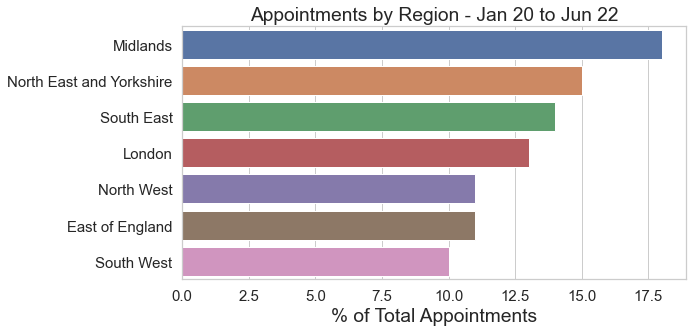

In [125]:
# Remove DNA and Unknown.
ar_region1 = ar_region[ar_region['appointment_status'] =='Attended']

# Create a plot for the graph.
sns.set(rc={'figure.figsize': (10,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.6)

# Create a barplot graph. 
ar_region_graph = sns.barplot(x='% of Total',y='region_name',data=ar_region1)

# Specify the labels.
ar_region_graph.set_xlabel("% of Total Appointments")
ar_region_graph.set_ylabel("")
ar_region_graph.set_title("Appointments by Region - Jan 20 to Jun 22")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('Region%.png')

# Print the output.
plt.show()

### What are the busiest locations?

In [177]:
# Group by location name. 
nc_location = nc1.groupby(['icb_name'])['count_of_appointments'].sum().to_frame().\
                        sort_values('count_of_appointments', ascending=False)

# Create a percentage of total appointments column.
nc_location_total = nc_location['count_of_appointments'].sum()
nc_location['% of Total'] =  (nc_location['count_of_appointments']/nc_location_total)*100

# Round to 0 decimal places.
nc_location['% of Total'] = nc_location['% of Total'].round(decimals=0)

# Reset the index so icb_name is a column.
nc_location = nc_location.reset_index()

# Print the output.
nc_location.head()

,icb_name,count_of_appointments,% of Total
0,North East and North Cumbria ICB,16882235,6.0
1,West Yorkshire ICB,14358371,5.0
2,Greater Manchester ICB,13857900,5.0
3,Cheshire and Merseyside ICB,13250311,4.0
4,North West London ICB,12142390,4.0


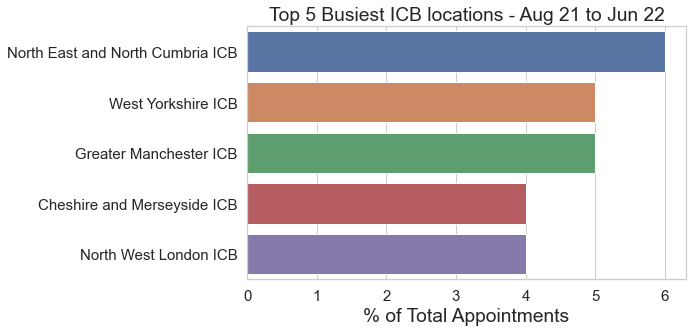

In [182]:
# Filter for the top 5 results.
nc_location_top5 = nc_location.head(5)

# Create a plot for the graph.
sns.set(rc={'figure.figsize': (10,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.6)

# Create a barplot graph. 
nc_location_top5_graph = sns.barplot(x='% of Total',y='icb_name',data=nc_location_top5)

# Specify the labels.
nc_location_top5_graph.set_xlabel("% of Total Appointments")
nc_location_top5_graph.set_ylabel("")
nc_location_top5_graph.set_title("Top 5 Busiest ICB locations - Aug 21 to Jun 22")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('Location%.png')

# Print the output.
plt.show()

### What are the busiest sub locations?

In [190]:
# Group by location name. 
nc_sub_location = nc1.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().to_frame().\
                        sort_values('count_of_appointments', ascending=False)

# Create a percentage of total appointments column.
nc_sub_location_total = nc_sub_location['count_of_appointments'].sum()
nc_sub_location['% of Total'] =  (nc_sub_location['count_of_appointments']/nc_sub_location_total)*100

# Round to 0 decimal places.
nc_sub_location['% of Total'] = nc_sub_location['% of Total'].round(decimals=0)

# Reset the index so icb_name is a column.
nc_sub_location = nc_sub_location.reset_index()

# Print the output.
nc_sub_location.head()

,sub_icb_location_name,count_of_appointments,% of Total
0,NHS North West London ICB - W2U3Z,12142390,4.0
1,NHS North East London ICB - A3A8R,9588891,3.0
2,NHS Kent and Medway ICB - 91Q,9286167,3.0
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102,3.0
4,NHS South East London ICB - 72Q,7850170,3.0


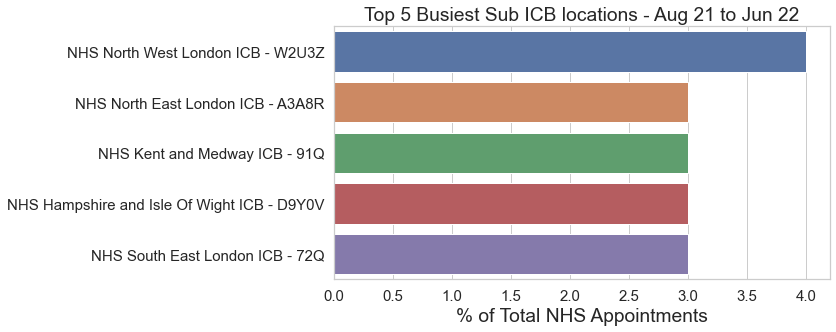

In [196]:
# Filter for the top 5 results.
nc_sub_location_top5 = nc_sub_location.head(5)

# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.6)

# Create a barplot graph. 
nc_sub_location_top5_graph = sns.barplot(x='% of Total',y='sub_icb_location_name',data=nc_sub_location_top5)

# Specify the labels.
nc_sub_location_top5_graph.set_xlabel("% of Total NHS Appointments")
nc_sub_location_top5_graph.set_ylabel("")
nc_sub_location_top5_graph.set_title("Top 5 Busiest Sub ICB locations - Aug 21 to Jun 22")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('SubLocation%.png')

# Print the output.
plt.show()

## 3.2 By Day Of The Week

### What are the busiest days of the week?

In [246]:
# Add a column with day of the week from nc1.
nc1['Day_of_the_week'] = nc1['appointment_date'].dt.day_name()

# Group by day of the week.
nc_weekday = nc1.groupby(['Day_of_the_week'])['count_of_appointments'].sum().to_frame().reset_index().\
                  sort_values(by='count_of_appointments')

# Create a percentage of total appointments column.
nc_weekday_total = nc_weekday['count_of_appointments'].sum()
nc_weekday['% of Total'] =  (nc_weekday['count_of_appointments']/nc_weekday_total)*100

# Round to 0 decimal places.
nc_weekday['% of Total'] = nc_weekday['% of Total'].round(decimals=1)

# Create an order for the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the order 
nc_weekday = nc_weekday.set_index('Day_of_the_week').reindex(day_order)

# Reset the index.
nc_weekday = nc_weekday.reset_index()

# Show the output.
nc_weekday

,Day_of_the_week,count_of_appointments,% of Total
0,Monday,59695267,20.2
1,Tuesday,61806933,20.9
2,Wednesday,58984265,19.9
3,Thursday,56976354,19.2
4,Friday,52394868,17.7
5,Saturday,5574922,1.9
6,Sunday,614161,0.2


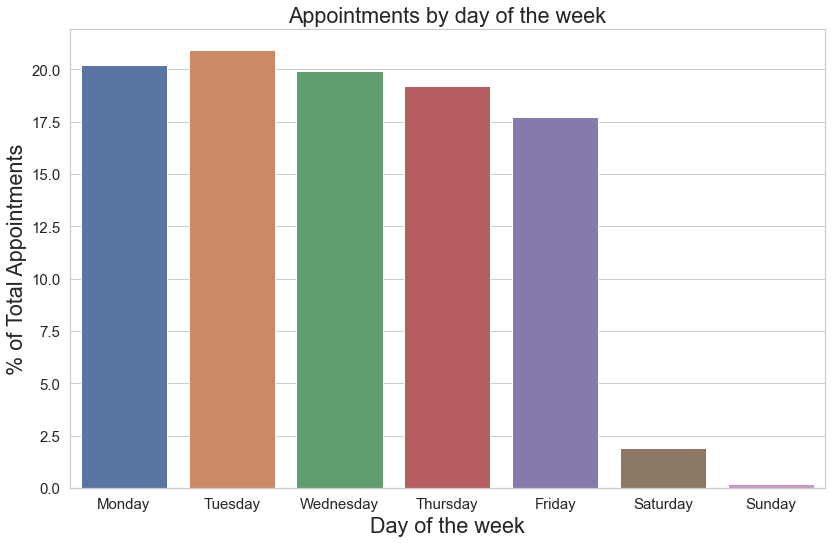

In [256]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,8), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
nc_weekday.graph = sns.barplot(x='Day_of_the_week', y='% of Total',data=nc_weekday)

# Set the labels.
plt.title("Appointments by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("% of Total Appointments")

# Rotate the x-axis labels.
plt.xticks(rotation=0)

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('day_of_week%.png')
                
# Print the output.    
plt.show()

## 3.3. By Measure 

### How many healthcare professionals are there?

In [40]:
# Group by hcp type.
hcp = ar1.groupby(['hcp_type'])['count_of_appointments'].sum().to_frame().reset_index().\
                  sort_values(by='count_of_appointments', ascending=False)

# Create a percentage of total appointments column.
hcp_total = hcp['count_of_appointments'].sum()
hcp['% of Total'] =  (hcp['count_of_appointments']/hcp_total)*100

# Round to 0 decimal places.
hcp['% of Total'] = hcp['% of Total'].round(decimals=0)

# Show the output.
hcp

,hcp_type,count_of_appointments,% of Total
0,GP,379650140,51.0
1,Other Practice staff,339650535,46.0
2,Unknown,23503850,3.0


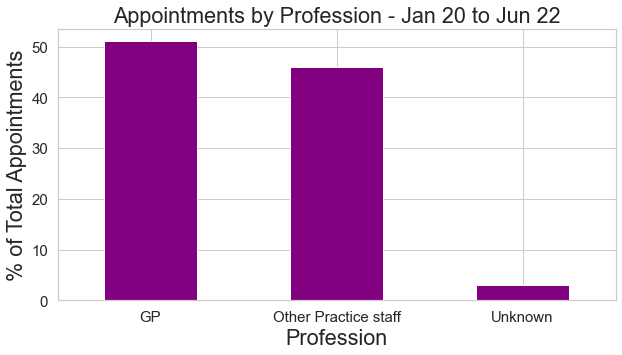

In [41]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (10,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
hcp.plot.bar(x='hcp_type', y='% of Total', color='purple', legend=False)

# Set the labels.
plt.title("Appointments by Profession - Jan 20 to Jun 22")
plt.xlabel("Profession")
plt.ylabel("% of Total Appointments")

# Rotate the x-axis labels.
plt.xticks(rotation=0)

# Save as png.
plt.savefig('HCP%.png')
                
# Print the output.    
plt.show()

### How many service settings are there?

In [42]:
# Group by service setting. 
service_settings_count = nc1.groupby(['service_setting'])['count_of_appointments'].sum()\
.sort_values(ascending = False).to_frame()

# Adding a column to show % of Total Appointments.
service_settings_total = service_settings_count['count_of_appointments'].sum()
service_settings_count['% of Total'] =  (service_settings_count['count_of_appointments']/service_settings_total)*100

# Round to 0 decimal places.
service_settings_count['% of Total'] = service_settings_count['% of Total'].round(decimals=0)

# Reset the index so service setting is a column.
service_settings_count = service_settings_count.reset_index()

# Print the output.
service_settings_count

,service_setting,count_of_appointments,% of Total
0,General Practice,270811691,91.0
1,Unmapped,11080810,4.0
2,Primary Care Network,6557386,2.0
3,Other,5420076,2.0
4,Extended Access Provision,2176807,1.0


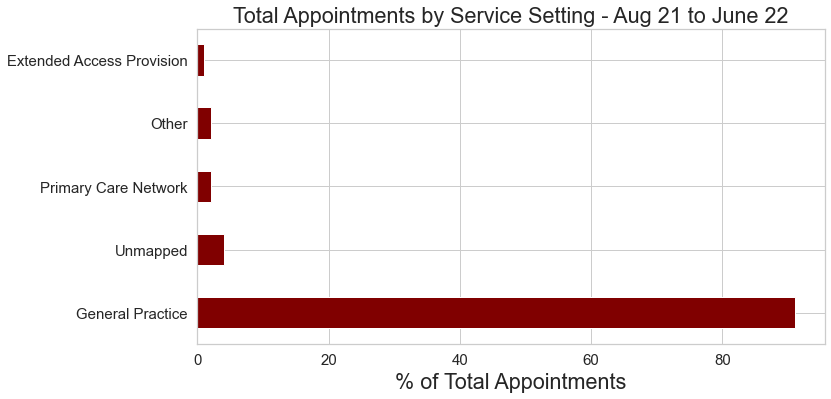

In [97]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,6), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
service_settings_count.plot.barh(x='service_setting', y='% of Total', color='maroon',legend=False)

# Set the labels.
plt.title("Total Appointments by Service Setting - Aug 21 to June 22")
plt.xlabel("% of Total Appointments")
plt.ylabel("")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('Service_setting%.png')

# Show the graph 
plt.show()

### How many context types are there?

In [44]:
# Group using context type.
context_type_count = nc1.groupby(['context_type'])['count_of_appointments'].sum()\
.sort_values(ascending = False).to_frame()

# Create a percentage of total appointments column.
context_type_total = context_type_count['count_of_appointments'].sum()
context_type_count['% of Total'] = (context_type_count['count_of_appointments']/context_type_total)*100

# Round to 0 decimal places.
context_type_count['% of Total'] = context_type_count['% of Total'].round(decimals=0)

# Reset the index so context type setting is a column.
context_type_count = context_type_count.reset_index()

# Print the output.
context_type_count

,context_type,count_of_appointments,% of Total
0,Care Related Encounter,257075158,87.0
1,Inconsistent Mapping,27890802,9.0
2,Unmapped,11080810,4.0


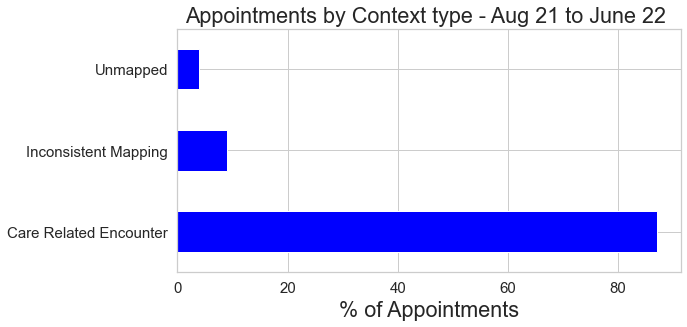

In [98]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (10,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a horizontal barplot.
context_type_count.plot.barh(x='context_type', y='% of Total', color='blue', legend=False)

# Set the labels.
plt.title("Appointments by Context type - Aug 21 to June 22 ")
plt.xlabel("% of Appointments")
plt.ylabel("")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('context_type%.png')

# Show the graph 
plt.show()

### How many national categories are there?

In [46]:
# Group by natinal category.
national_category_count = nc1.groupby(['national_category'])['count_of_appointments'].sum()\
.sort_values(ascending = False).to_frame()

# Create a percentage of total appointments column.
national_category_total = national_category_count['count_of_appointments'].sum()
national_category_count['% of Total'] =  (national_category_count['count_of_appointments']/national_category_total)*100

# Round to 0 decimal places.
national_category_count['% of Total'] = national_category_count['% of Total'].round(decimals=0)

# Reset the index so national category is a column.
national_category_count = national_category_count.reset_index()

# Print the output.
national_category_count

,national_category,count_of_appointments,% of Total
0,General Consultation Routine,97271522,33.0
1,General Consultation Acute,53691150,18.0
2,Clinical Triage,41546964,14.0
3,Planned Clinics,28019748,9.0
4,Inconsistent Mapping,27890802,9.0
5,Planned Clinical Procedure,25702694,9.0
6,Unmapped,11080810,4.0
7,Unplanned Clinical Activity,3055794,1.0
8,Home Visit,2144452,1.0
9,Structured Medication Review,1858379,1.0


In [72]:
# Create a threshold of 5 percent.
threshold = 5

# Create a DataFrame with categories above 5 percent.
nc_top_5 = national_category_count[national_category_count['% of Total'] >= threshold]

# Create a DataFrame with categories below 5 percent.
other_nc = national_category_count[national_category_count['% of Total'] <= threshold]

# Create a dictionary that aggregates other_nc DataFrame.
other_nc_data = {'national_category':'Other','count_of_appointments': other_nc['count_of_appointments'].sum(), '% of Total': other_nc['% of Total'].sum()}

# Create a DataFrame from other_nc_data dictionary.
other_nc_agg = pd.DataFrame(other_nc_data, index=[0])

# Append the tables together. 
nc_summary = pd.concat([nc_top_5,other_nc_agg])

# Show the output
nc_summary


,national_category,count_of_appointments,% of Total
0,General Consultation Routine,97271522,33.0
1,General Consultation Acute,53691150,18.0
2,Clinical Triage,41546964,14.0
3,Planned Clinics,28019748,9.0
4,Inconsistent Mapping,27890802,9.0
5,Planned Clinical Procedure,25702694,9.0
0,Other,21923890,7.0


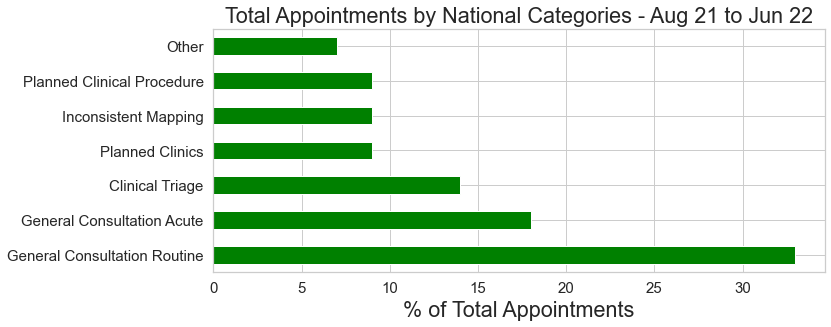

In [105]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,5), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
nc_summary.plot.barh(x='national_category', y='% of Total', color='green', legend=False)

# Set the labels.
plt.title("Total Appointments by National Categories - Aug 21 to Jun 22")
plt.xlabel("% of Total Appointments")
plt.ylabel("")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('National_cats%.png')

# Show the graph 
plt.show()

### What was the attendance rate of appointments?

In [197]:
# Group by appointment status
app_status = ar1.groupby(['appointment_status'])['count_of_appointments'].sum().to_frame().reset_index()

# Create a percentage of total appointments column.
app_status_total = app_status['count_of_appointments'].sum()
app_status['% of Total'] =  (app_status['count_of_appointments']/app_status_total)*100

# Round to 0 decimal places.
app_status['% of Total'] = app_status['% of Total'].round(decimals=2)

# Sort by percentage of total.
app_status = app_status.sort_values(by='% of Total', ascending=False)

# View the output.
app_status

,appointment_status,count_of_appointments,% of Total
0,Attended,677755876,91.24
2,Unknown,34137416,4.60
1,DNA,30911233,4.16


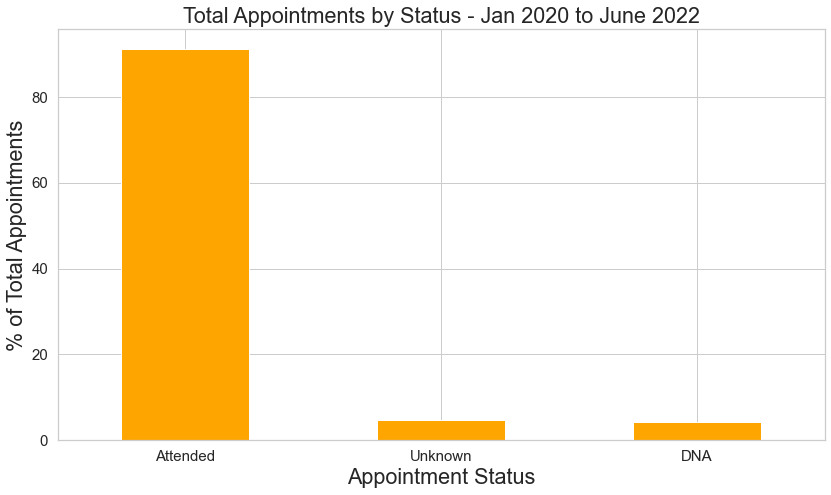

In [208]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,8), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
app_status.plot.bar(x='appointment_status', y='% of Total', color='orange', legend=False)

# Set the labels.
plt.title("Total Appointments by Status - Jan 2020 to June 2022")
plt.xlabel("Appointment Status")
plt.ylabel("% of Total Appointments")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('App_status%.png')

# Rotate the x-axis labels
plt.xticks(rotation=0)
                
# Print the output.    
plt.show()

### What were the methods of appointments?

In [200]:
# Group by appointment mode.
app_mode = ar1.groupby(['appointment_mode'])['count_of_appointments'].sum().to_frame().reset_index()

# Create a percentage of total appointments column.
app_mode_total = app_mode['count_of_appointments'].sum()
app_mode['% of Total'] =  (app_mode['count_of_appointments']/app_mode_total)*100

# Round to 0 decimal places.
app_mode['% of Total'] = app_mode['% of Total'].round(decimals=2)

# Sort by percentage of total.
app_mode = app_mode.sort_values(by='% of Total', ascending=False)

# Show the output.
app_mode

,appointment_mode,count_of_appointments,% of Total
0,Face-to-Face,439981729,59.23
2,Telephone,267862657,36.06
3,Unknown,26451305,3.56
1,Home Visit,4887876,0.66
4,Video/Online,3620958,0.49


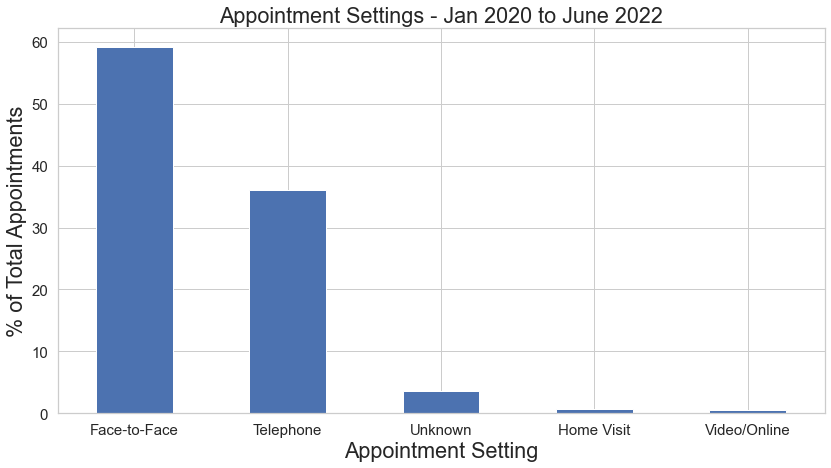

In [212]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (12,8), 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style='whitegrid', font_scale=1.8)

# Visualise the results using a barplot.
app_mode.plot.bar(x='appointment_mode', y='% of Total', legend=False)

# Set the labels.
plt.title("Appointment Settings - Jan 2020 to June 2022")
plt.xlabel("Appointment Setting")
plt.ylabel("% of Total Appointments")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('App_setting%.png')

# Rotate the x-axis labels
plt.xticks(rotation=0)
                
# Print the output.    
plt.show()

## 3.2 By Time

### What were the total appointments per month?

In [213]:
# Subset attended rows in ar1 DataFrame.
app_att = ar1[ar1['appointment_status'] =='Attended']

# Group by appointment month and call the new DataFrame ar_month. 
ar_month = app_att.groupby(['appointment_month'])['count_of_appointments'].sum().to_frame().reset_index()

# Format date to show just year and month.
ar_month['appointment_month'] = ar_month['appointment_month'].dt.strftime('%b-%Y')

# View the output.
ar_month.head()

,appointment_month,count_of_appointments
0,Jan-2020,24538291
1,Feb-2020,21640067
2,Mar-2020,20718865
3,Apr-2020,13982824
4,May-2020,14962850


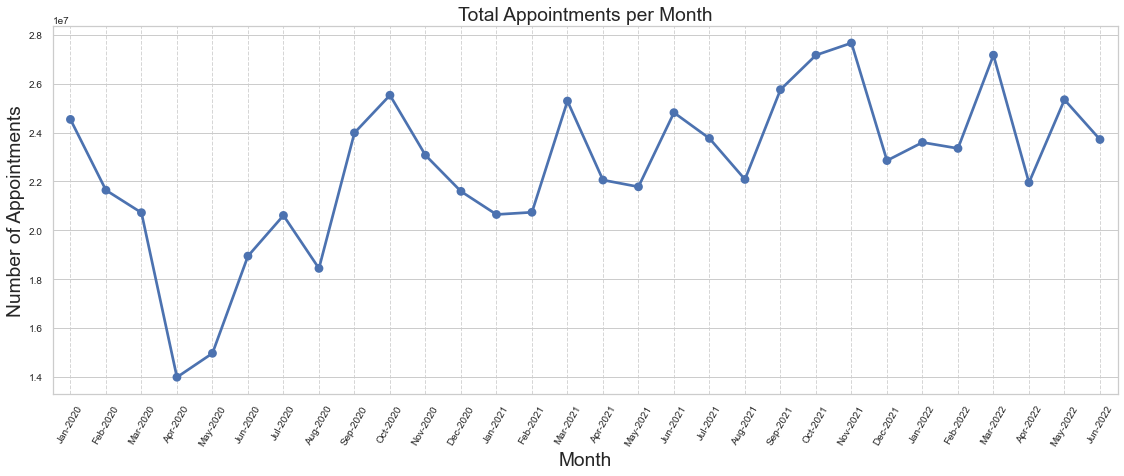

In [264]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (16,7), 'xtick.labelsize': 10, 'ytick.labelsize': 10}, style='whitegrid', font_scale=1.6)

# Create a graph to show appointments per month.
ar_month_graph = sns.pointplot(x='appointment_month', y='count_of_appointments', data=ar_month, saturation=.8)

# Rotate x labels by 45 degrees.
plt.xticks(rotation=60)

# Add the grid with horizontal lines.
ar_month_graph.axes.grid(True, axis='x', linestyle='--',alpha=0.8)

# Specify the labels.
ar_month_graph.set_xlabel("Month")
ar_month_graph.set_ylabel("Number of Appointments")
ar_month_graph.set_title("Total Appointments per Month")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('App_month_raw%.png')

# Print the output.
plt.show()

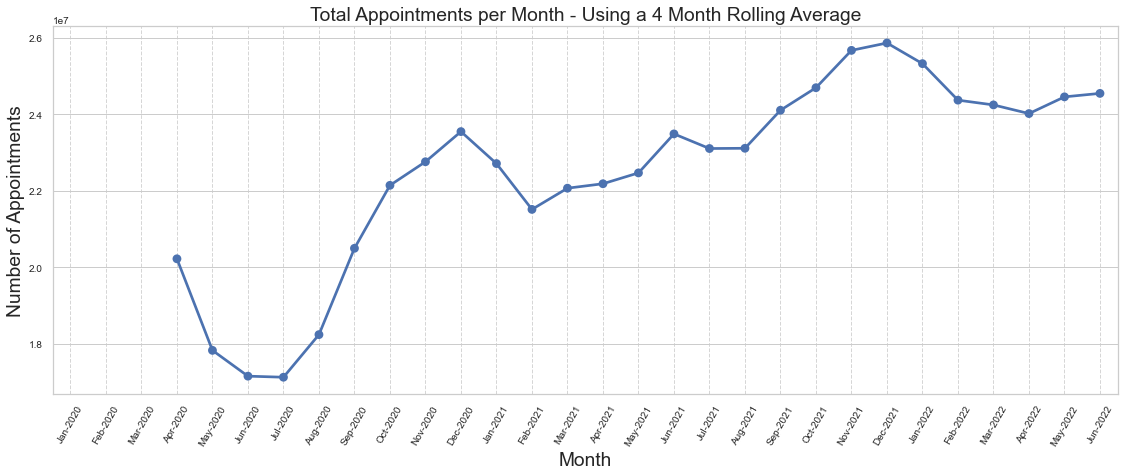

In [265]:
# Create a rolling series of appointments per month.
rolling_ser = ar_month['count_of_appointments'].rolling(window=4)

# Create the mean of rolling_app.
rolling_mean = rolling_ser.mean()

# Create a new DataFrame with appointment month and rolling mean. 
rolling_app = pd.DataFrame({'appointment_month': ar_month['appointment_month'],'rolling_mean' : rolling_mean})

# Create a plot for the graph.
sns.set(rc={'figure.figsize': (16,7), 'xtick.labelsize': 10, 'ytick.labelsize': 10}, style='whitegrid', font_scale=1.6)

# Create a graph to show appointments per month.
rolling_app_graph = sns.pointplot(x='appointment_month', y='rolling_mean', data=rolling_app, saturation=.8)

# Rotate x labels by 45 degrees.
plt.xticks(rotation=60)

# Add the grid with horizontal lines.
rolling_app_graph.axes.grid(True, axis='x', linestyle='--',alpha=0.8)

# Specify the labels.
rolling_app_graph.set_xlabel("Month")
rolling_app_graph.set_ylabel("Number of Appointments")
rolling_app_graph.set_title("Total Appointments per Month - Using a 4 Month Rolling Average")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('App_month_rolling%.png')

# Print the output.
plt.show()

### What were the total appointments per month according to appointment setting?

In [263]:
# Group by month and appointment mode.
app_mode_monthly = ar1.groupby(['appointment_mode','appointment_month'])['count_of_appointments']\
                    .sum().to_frame().reset_index()

# Format date to show just year and month.
app_mode_monthly['appointment_month'] = app_mode_monthly['appointment_month'].dt.strftime('%b-%Y')

# View the output.
app_mode_monthly

,appointment_mode,appointment_month,count_of_appointments
0,Face-to-Face,Jan-2020,21733394
1,Face-to-Face,Feb-2020,19230573
2,Face-to-Face,Mar-2020,15921794
3,Face-to-Face,Apr-2020,7480941
4,Face-to-Face,May-2020,7729597
...,...,...,...
145,Video/Online,Feb-2022,127697
146,Video/Online,Mar-2022,152018
147,Video/Online,Apr-2022,126453
148,Video/Online,May-2022,144188


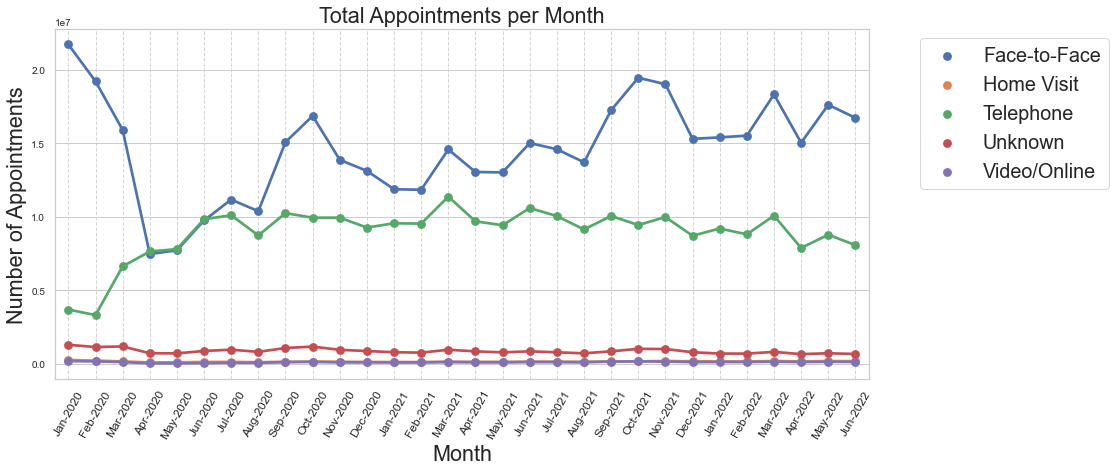

In [272]:
# Create a plot for the graph.
sns.set(rc={'figure.figsize': (16,7), 'xtick.labelsize': 12, 'ytick.labelsize': 10}, style='whitegrid', font_scale=1.8)

# Create a graph to show appointments per month.
app_mode_monthly_graph = sns.pointplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode',\
                                       data=app_mode_monthly, saturation=.8)

# Rotate x labels by 45 degrees.
plt.xticks(rotation=60)

# Add the grid with horizontal lines.
app_mode_monthly_graph.axes.grid(True, axis='x', linestyle='--',alpha=0.8)

# Specify the labels.
app_mode_monthly_graph.set_xlabel("Month")
app_mode_monthly_graph.set_ylabel("Number of Appointments")
app_mode_monthly_graph.set_title("Total Appointments per Month")

# Move the legend out of the graph.
app_mode_monthly_graph.legend(bbox_to_anchor=(1.05,1), loc=2)

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('App_mode_monthly.png')

# Print the output.
plt.show()

# 4. Diagnostic Analysis

### What is the relationship between Attendance and Wait Time?

In [285]:
# Create a DataFrame to show appointments by icb location and appointment mode.
ar_wait = ar1.loc[:,['icb_ons_code','time_between_book_and_appointment','count_of_appointments']].copy()

# Group by icb location and appointment mode.
ar_wait_g = ar_wait.groupby(['icb_ons_code','time_between_book_and_appointment'])['count_of_appointments'].sum().\
                            to_frame().reset_index()

# View the output.
ar_wait_g.head()

,icb_ons_code,time_between_book_and_appointment,count_of_appointments
0,E54000008,1 Day,3383990
1,E54000008,15 to 21 Days,1677630
2,E54000008,2 to 7 Days,6653761
3,E54000008,22 to 28 Days,951927
4,E54000008,8 to 14 Days,3565708


In [287]:
# Create a DataFrame to show appointments by icb location and appointment mode.
ar_wait_att = ar1.loc[:,['icb_ons_code','time_between_book_and_appointment',\
                         'appointment_status','count_of_appointments']].copy()

# Filter by attended only.
ar_wait_filter = ar_wait_att[ar_wait_att['appointment_status'] =='Attended']

# Group by icb location and appointment mode.
ar_wait_filter_g = ar_wait_filter.groupby(['icb_ons_code','time_between_book_and_appointment'])\
                                          ['count_of_appointments'].sum().to_frame().reset_index() 

# View the output.
ar_wait_filter_g.head()

,icb_ons_code,time_between_book_and_appointment,count_of_appointments
0,E54000008,1 Day,3100284
1,E54000008,15 to 21 Days,1372727
2,E54000008,2 to 7 Days,5876830
3,E54000008,22 to 28 Days,754931
4,E54000008,8 to 14 Days,3006009


In [292]:
# Merge ar_wait_g and ar_wait_filter_g
att_wait = ar_wait_filter_g.merge(ar_wait_g[['icb_ons_code','time_between_book_and_appointment','count_of_appointments']],\
                         on=['icb_ons_code','time_between_book_and_appointment'])

att_wait = att_wait.rename(columns={'count_of_appointments_x': 'Attended_Appointments',\
                                  'count_of_appointments_y': 'Total_Appointments'})


# Create a column showing percentage attended.
att_wait['%_Attended'] = (att_wait['Attended_Appointments']/att_wait['Total_Appointments'])*100

# Round to 0 decimal places.
att_wait['%_Attended'] = att_wait['%_Attended'].round(decimals=0)

att_wait.head()

,icb_ons_code,time_between_book_and_appointment,Attended_Appointments,Total_Appointments,%_Attended
0,E54000008,1 Day,3100284,3383990,92.0
1,E54000008,15 to 21 Days,1372727,1677630,82.0
2,E54000008,2 to 7 Days,5876830,6653761,88.0
3,E54000008,22 to 28 Days,754931,951927,79.0
4,E54000008,8 to 14 Days,3006009,3565708,84.0


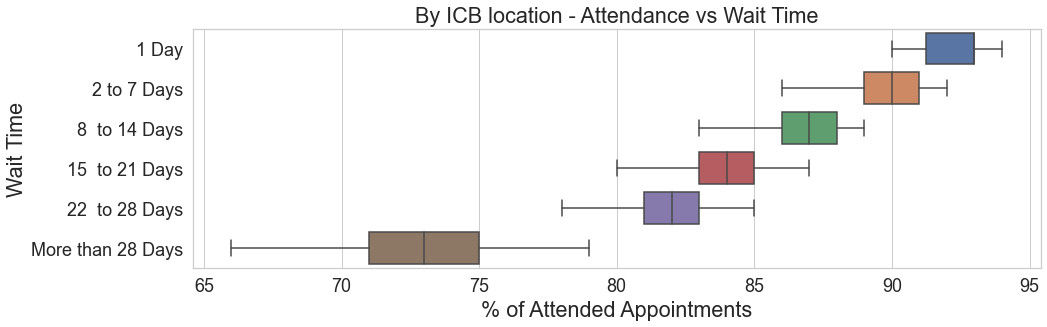

In [430]:
# Create a plot for the graph. 
sns.set(rc={'figure.figsize': (15,5), 'xtick.labelsize': 18, 'ytick.labelsize': 18}, style='whitegrid', font_scale=1.8)

# Create an order for the wait times.
wait_order = ["1 Day", "2 to 7 Days", "8  to 14 Days", "15  to 21 Days", "22  to 28 Days",\
              "More than 28 Days"]

att_wait_graph = sns.boxplot(x='%_Attended', y='time_between_book_and_appointment', data=att_wait, order=wait_order)

# Specify the labels.
att_wait_graph.set_ylabel("Wait Time")
att_wait_graph.set_xlabel("% of Attended Appointments")
att_wait_graph.set_title("By ICB location - Attendance vs Wait Time")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('att%_vs_waittime.png')

# Print the output.
plt.show()

### What is the relationship between Attendance and Appointment Setting?

In [274]:
# Create a DataFrame to show appointments by icb location and appointment mode.
ar_mode = ar1.loc[:,['icb_ons_code','appointment_mode','count_of_appointments']].copy()

# Group by icb location and appointment mode.
ar_mode_g = ar_mode.groupby(['icb_ons_code','appointment_mode'])['count_of_appointments'].sum().\
                            to_frame().reset_index()

# View the output.
ar_mode_g.head()

,icb_ons_code,appointment_mode,count_of_appointments
0,E54000008,Face-to-Face,18562917
1,E54000008,Home Visit,472501
2,E54000008,Telephone,13387435
3,E54000008,Unknown,579382
4,E54000008,Video/Online,97647


In [275]:
# Create a DataFrame to show appointments by icb location and appointment mode.
ar_att = ar1.loc[:,['icb_ons_code','appointment_mode', 'appointment_status','count_of_appointments']].copy()

# Filter by attended only.
ar_filter = ar_att[ar_att['appointment_status'] =='Attended']

# Group by icb location and appointment mode.
ar_att_g = ar_filter.groupby(['icb_ons_code','appointment_mode'])['count_of_appointments'].sum().\
                            to_frame().reset_index() 

# View the output.
ar_att_g.head()

,icb_ons_code,appointment_mode,count_of_appointments
0,E54000008,Face-to-Face,16421684
1,E54000008,Home Visit,336161
2,E54000008,Telephone,12540735
3,E54000008,Unknown,491590
4,E54000008,Video/Online,91476


In [276]:
# Merge ar_mode_g and ar_att_g 
att_app = ar_att_g.merge(ar_mode_g[['icb_ons_code','appointment_mode','count_of_appointments']],\
                         on=['icb_ons_code','appointment_mode'])

att_app = att_app.rename(columns={'count_of_appointments_x': 'Attended_Appointments',\
                                  'count_of_appointments_y': 'Total_Appointments'})

# Adding a column to show attended appointments as a % of total appoinments.
att_app['%_Attended'] = (att_app['Attended_Appointments']/att_app['Total_Appointments'])*100

#Round the % of total to 3 significant figures.
att_app['%_Attended'] = att_app['%_Attended'].round(decimals=2)

att_app.head()

,icb_ons_code,appointment_mode,Attended_Appointments,Total_Appointments,%_Attended
0,E54000008,Face-to-Face,16421684,18562917,88.46
1,E54000008,Home Visit,336161,472501,71.15
2,E54000008,Telephone,12540735,13387435,93.68
3,E54000008,Unknown,491590,579382,84.85
4,E54000008,Video/Online,91476,97647,93.68


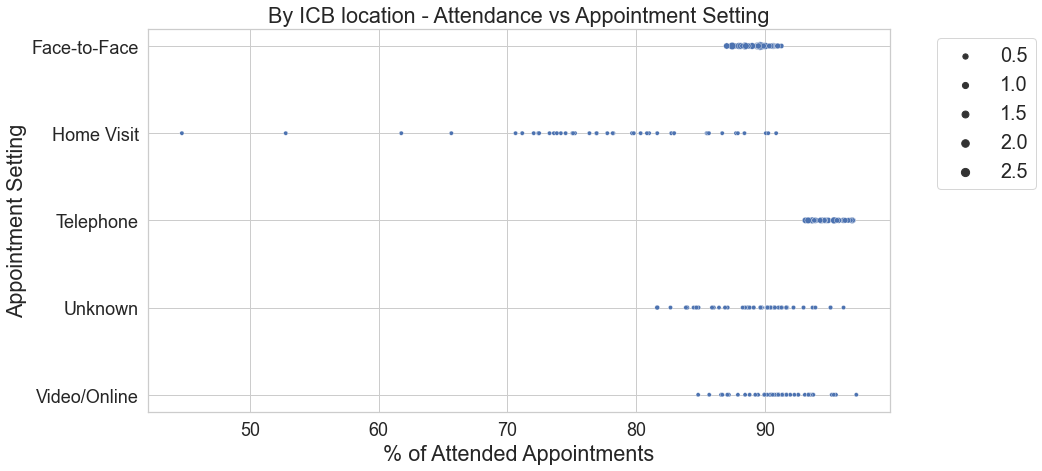

In [381]:
# Create a plot for the graph. 
sns.set(rc={'figure.figsize': (15,7), 'xtick.labelsize': 18, 'ytick.labelsize': 18}, style='whitegrid', font_scale=1.8)

att_app_graph = sns.scatterplot(x='%_Attended', y='appointment_mode', data=att_app, size='Total_Appointments',\
                                palette='bright')

# Specify the labels.
att_app_graph.set_ylabel("Appointment Setting")
att_app_graph.set_xlabel("% of Attended Appointments")
att_app_graph.set_title("By ICB location - Attendance vs Appointment Setting")

# Move the legend out of the graph.
att_app_graph.legend(bbox_to_anchor=(1.05,1), loc=2)

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('att%_vs_mode.png')

# Print the output.
plt.show()


### What type of appointments had wait times more than 28 days?

In [404]:
# Create a DataFrame to show appointments by icb location and appointment mode.
ar_28days = ar1.loc[:,['region_name','time_between_book_and_appointment',\
                         'appointment_mode','appointment_status','count_of_appointments','hcp_type']].copy()

# Create a filter for only rows with More than 28 Days.
ar_28days_filtered = ar_28days.loc[(ar_28days['time_between_book_and_appointment'] == 'More than 28 Days')\
                     & (ar_28days['appointment_status'] != 'Attended') & \
                       (ar_28days['appointment_mode'] == 'Face-to-Face')]

# Group by icb location and appointment mode.
ar_28days_filtered_g = ar_28days_filtered.groupby(['region_name','hcp_type'])\
                                          ['count_of_appointments'].sum().to_frame().reset_index()

# Show the output.
ar_28days_filtered_g.head()

,region_name,hcp_type,count_of_appointments
0,East of England,GP,164618
1,East of England,Other Practice staff,559727
2,East of England,Unknown,682
3,London,GP,106834
4,London,Other Practice staff,213027


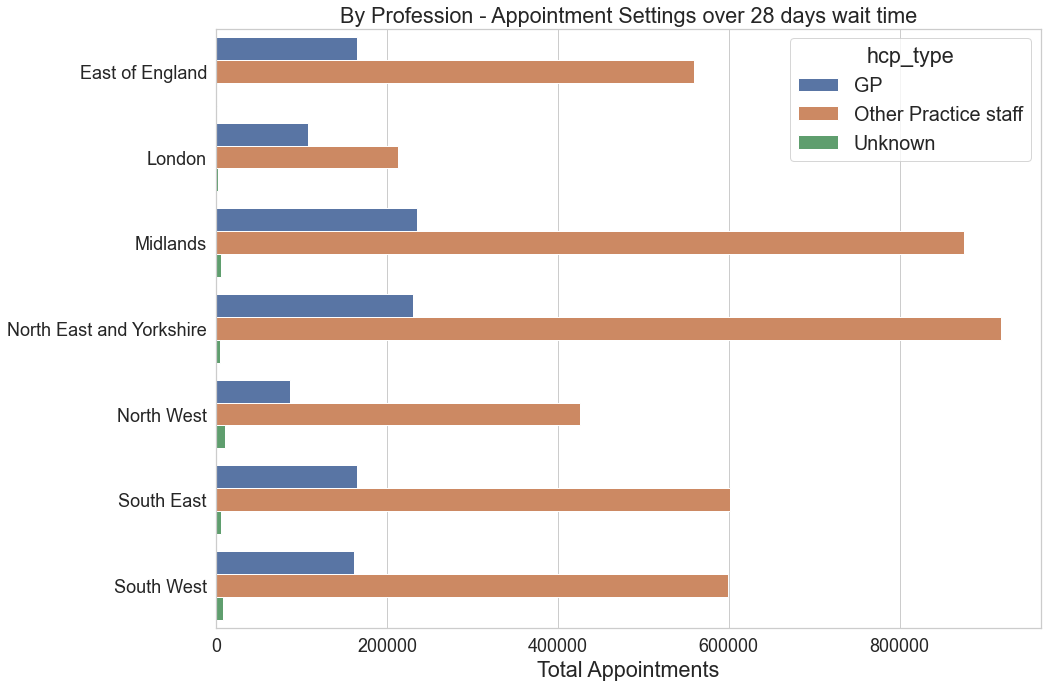

In [429]:
# Create a plot for the graph. 
sns.set(rc={'figure.figsize': (15,10), 'xtick.labelsize': 18, 'ytick.labelsize': 18}, style='whitegrid', font_scale=1.8)

ar_28days_filtered_g_graph = sns.barplot(x='count_of_appointments', y='region_name',hue='hcp_type',\
                                         ci=None, data=ar_28days_filtered_g)

# Move the legend out of the graph.
att_app_graph.legend(bbox_to_anchor=(1.05,1), loc=2)

# Specify the labels.
ar_28days_filtered_g_graph.set_ylabel("")
ar_28days_filtered_g_graph.set_xlabel("Total Appointments")
ar_28days_filtered_g_graph.set_title("By Profession - Appointment Settings over 28 days wait time")

# Ensure all of the graph is in the png.
plt.tight_layout()

# Save as png.
plt.savefig('28days_f2f.png')

# Print the output.
plt.show()